In [3]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np

%matplotlib inline

images_folder = "../Images"

oppenheimer = "oppenheimer.png"
explosion = "atomicbomb.jpg"
flatbarbie = "barbie_flat.png"
faded = "low.png"
iris = "iris1.png"
stairs = "stairs2.png"

#joining paths for all images
path_oppenheimer = os.path.join(images_folder, oppenheimer)
path_explosion = os.path.join(images_folder, explosion)
path_flatbarbie =  os.path.join(images_folder, flatbarbie)
path_faded = os.path.join(images_folder, faded)
path_iris = os.path.join(images_folder, iris)
path_stairs = os.path.join(images_folder, stairs)

#reading images and storing in respective variables
oppenheimer = cv2.imread(path_oppenheimer)
explosion = cv2.imread(path_explosion)
flatbarbie = cv2.imread(path_flatbarbie)
faded = cv2.imread(path_faded)
iris = cv2.imread(path_iris)
stairs = cv2.imread(path_stairs)

# 1 Oppenheimer’s Poster

#### 1.1

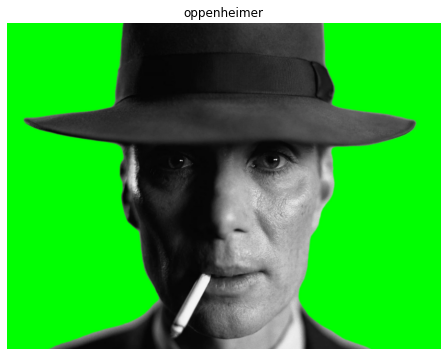

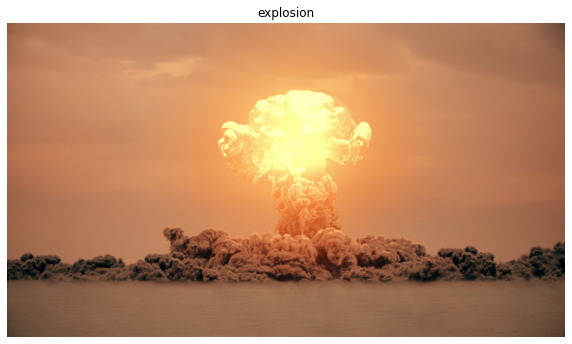

In [4]:
oppenheimer = cv2.cvtColor(oppenheimer, cv2.COLOR_BGR2RGB)

plt.figure(figsize =(10,6))
plt.imshow(oppenheimer)
plt.axis("off")
plt.title("oppenheimer")
plt.show()

plt.figure(figsize =(10,6))
explosion = cv2.cvtColor(explosion, cv2.COLOR_BGR2RGB)
plt.imshow(explosion)
plt.title("explosion")
plt.axis("off")
plt.show()

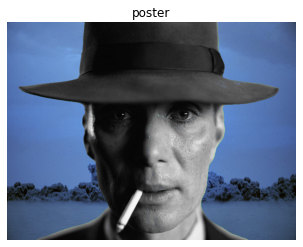

True

In [5]:
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

explosion_resized = cv2.resize(explosion, (oppenheimer.shape[1], oppenheimer.shape[0]))

# Create a mask for the green screen area
green_mask = cv2.inRange(oppenheimer, lower_green, upper_green)

# Invert the mask to get the non-green areas
inverse_mask = cv2.bitwise_not(green_mask)

# Extract the non-green areas from oppenheimer and background portion of image
oppenheimer_profile = cv2.bitwise_and(oppenheimer, oppenheimer, mask=inverse_mask)
explosion_background = cv2.bitwise_and(explosion_resized, explosion_resized, mask = green_mask)

# Combine the non-green oppenheimer area and the background image
result = cv2.add(oppenheimer_profile, explosion_background)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result)
plt.axis("off")
plt.title("poster")
plt.show()

cv2.imwrite("../Images/results/res.jpg", result)

#### 1.2 More posters using other images

In [6]:
def merge_poster(lower_bound, upper_bound, foreground, background):
    background_resized = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))
    green_mask = green_mask = cv2.inRange(foreground, lower_bound, upper_bound)
    inverse_mask = cv2.bitwise_not(green_mask)
    foreground_profile = cv2.bitwise_and(foreground, foreground, mask=inverse_mask)
    background_profile = cv2.bitwise_and(background_resized, background_resized, mask = green_mask)
     
    result = cv2.add(foreground_profile, background_profile)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    return result

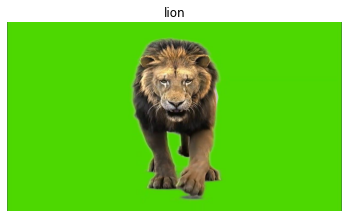

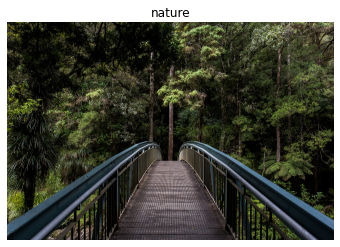

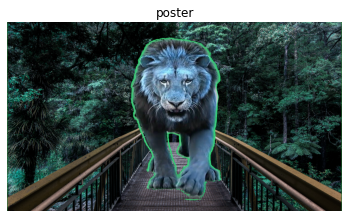

True

In [7]:
#images_folder = "../Images"

lion = "lion.jpeg"
path_lion = os.path.join(images_folder, lion)
lion = cv2.imread(path_lion)

jungle = "jungle.jpg"
path_jungle = os.path.join(images_folder, jungle)
jungle = cv2.imread(path_jungle)

nature = "nature.jpg"
path_nature = os.path.join(images_folder, nature)
nature = cv2.imread(path_nature)

lion = cv2.cvtColor(lion, cv2.COLOR_BGR2RGB)
jungle = cv2.cvtColor(jungle, cv2.COLOR_BGR2RGB)
nature = cv2.cvtColor(nature, cv2.COLOR_BGR2RGB)

plt.imshow(lion)
plt.axis("off")
plt.title("lion")
plt.show()

plt.imshow(nature)
plt.title("nature")
plt.axis("off")
plt.show()


lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

poster2 = merge_poster(lower_green, upper_green, lion, nature)

plt.imshow(poster2)
plt.title("poster")
plt.axis("off")
plt.show()

cv2.imwrite("../Images/results/poster2.jpg", poster2)


#### 1.3

### Let us consider the size of each image: 
##### * Assuming each pixel requires 3 bytes, size of each image = 720 x 420 x 3 = 1,036,800 bytes

##### * Now available space = size of cloud = 2 GB. Size of cloud in bytes = 2GB x 2*30 bytes = 2,147,483,648 bytes
##### * Number of images that can be stored in a cloud of size 2 GB =  Total cloud size in bytes / size of each image in bytes
##### 2,147,483,648 / 1,036,800 ~ 2071 images.

# 2 Quantized Explosion

2.1, 2.2

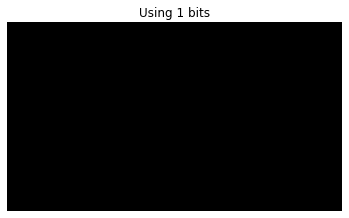

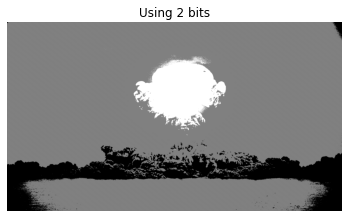

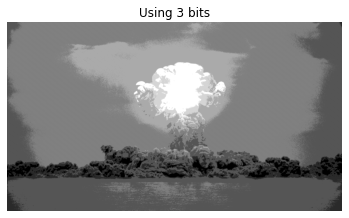

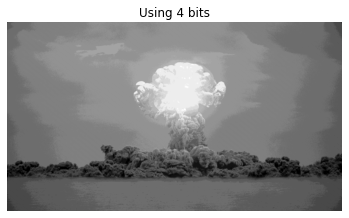

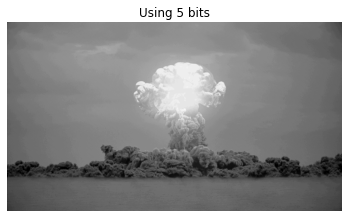

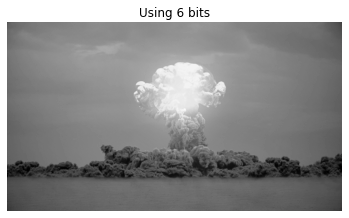

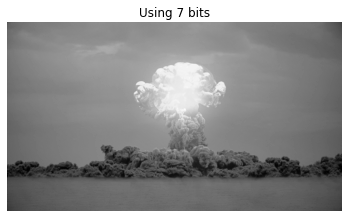

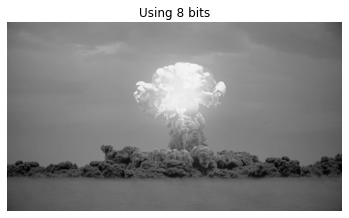

In [8]:
def bitQuantizeImage(im , k):
    normalized_image = im/255.0
    quantized_image= normalized_image*(2**(k)-1)
    return quantized_image.astype(np.uint8)

gray_explosion = cv2.cvtColor(explosion,cv2.COLOR_BGR2GRAY)

for i in range (1,9):
    quantized_explosion = bitQuantizeImage(gray_explosion,i)
    plt.imshow(quantized_explosion, cmap="gray")
    plt.title(f"Using {i} bits")
    plt.axis("off")
    plt.show()

#### 2.3 Bit plane slicing of explosion image

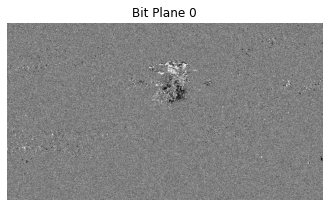

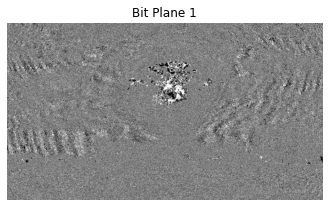

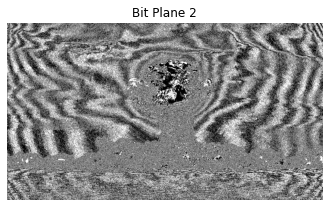

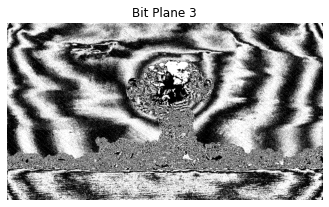

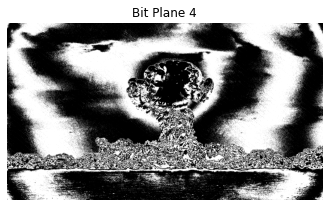

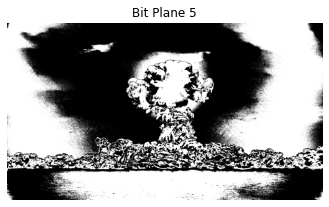

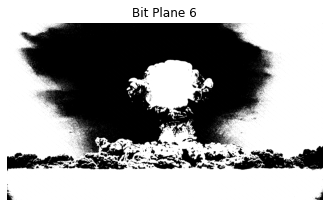

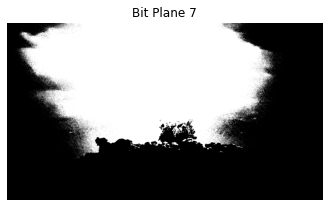

In [9]:
def bit_plane_slice(image, k):
    return ((image >> k) & 1) * 255

for k in range(8):
    sliced_image = bit_plane_slice(gray_explosion, k)
    plt.figure(figsize=(30,15))
    plt.subplot(4, 2, k%4 + 1)
    plt.imshow(sliced_image, cmap='gray')
    plt.title(f'Bit Plane {k}')
    plt.axis('off')

# Observations

#### In image processing, bit plane slicing involves the extraction of individual bits, known as binary planes, from the pixel values of an image.

#### Each pixel in a grayscale image is represented using 8 bits. These bits can be considered as planes, with the most significant bit (MSB) residing in the 7th plane (bit 7), and the least significant bit (LSB) in the 0th plane (bit 0).

#### We note lower bit planes, such as "Bit plane 1," predominantly contain noise from the input image. This noise arises because these planes represent the least significant information in the image. The lower bits don't contribute significantly to the overall image content and are more susceptible to variations and imperfections.

#### Conversely, the higher bit planes, like those in the 6th to 7th positions, contain more crucial information within an image. These planes represent the more significant bits of pixel values, which contribute significantly to the image's overall appearance. Images derived from these higher bit planes tend to capture essential features and details present in the original image,

# 3 Colour Corrected Barbie

### Function to stretch contrast of input image

In [10]:
def linContrastStretching(image, a, b):
    image = image/255.0
    #calculating min and max intensity of the image to get the range
    min_intensity = np.min(image)
    max_intensity = np.max(image)

    range = max_intensity - min_intensity
    
    #formula to stretch contrast
    stretched_image = (image - min_intensity) * ((b - a) / (range)) + a
    stretched_image = np.clip(stretched_image, a, b) 
    # Clip values to ensure they stay within [a, b]
    
    return stretched_image.astype(np.uint8)

### Function to return the colorbar consisting of 10 most frequent colors in an image by default

In [11]:
from collections import Counter

def makecolorbar(im):
    pixels = im.reshape(-1, 3)

    # Calculate color frequencies
    color_counts = Counter(tuple(pixel) for pixel in pixels)

    # Number of colors returned can be changed here
    extract_common_colors = color_counts.most_common(10)
    
    # Extract the most common colors
    colors = [list(color[0]) for color in extract_common_colors]

    # Create a colorbar image

    colorbar_width = 1000  # Width of the colorbar
    colorbar_height = 100  # Height of the colorbar 

    colorbar = np.zeros((colorbar_height, colorbar_width, 3), dtype=np.uint8)

    # Filling the colorbar with the most common colors
    color_width = colorbar_width // len(colors)

    for i, color in enumerate(colors):
        start_x = i * color_width
        end_x = start_x + color_width
        colorbar[:, start_x:end_x] = color

    return colorbar

### Displaying original flatbarbie image and its colorbar

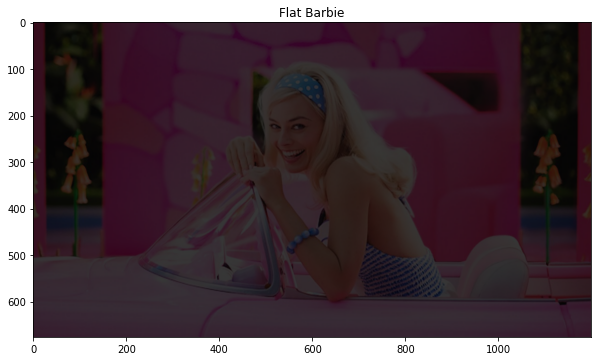

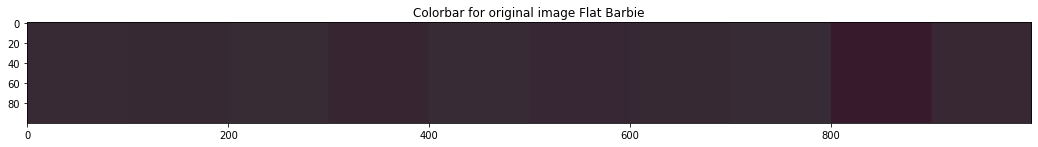

In [12]:
from collections import Counter

flatbarbie = cv2.cvtColor(flatbarbie, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(flatbarbie)
plt.title("Flat Barbie")
plt.show()

# Display colorbar for flat barbie image

flat_colorbar = makecolorbar(flatbarbie)

plt.figure(figsize=(18, 6))
plt.imshow(flat_colorbar)
plt.title("Colorbar for original image Flat Barbie")
plt.show()

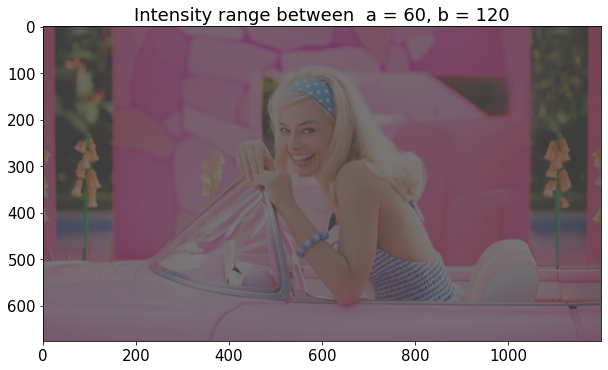

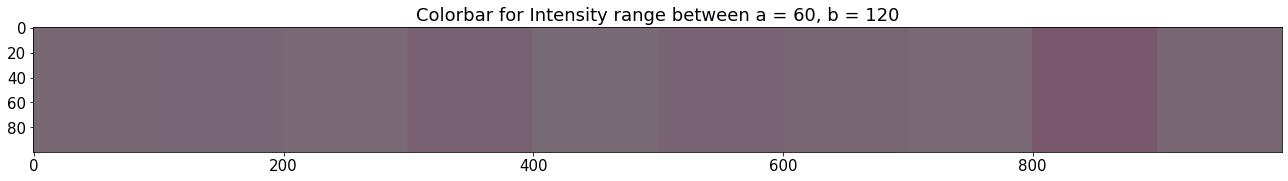

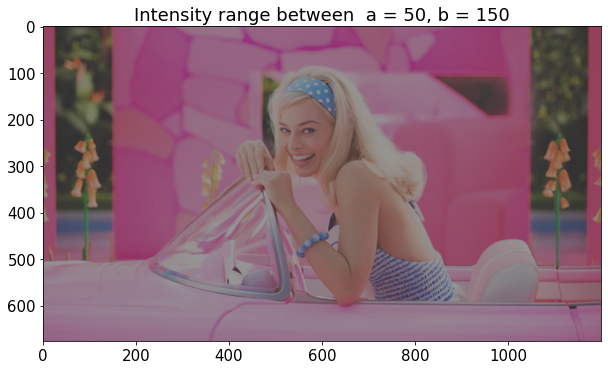

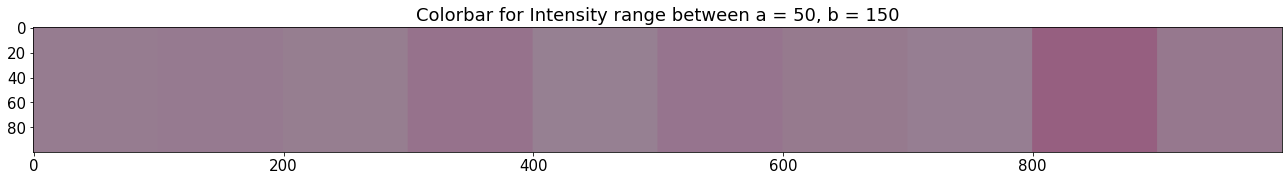

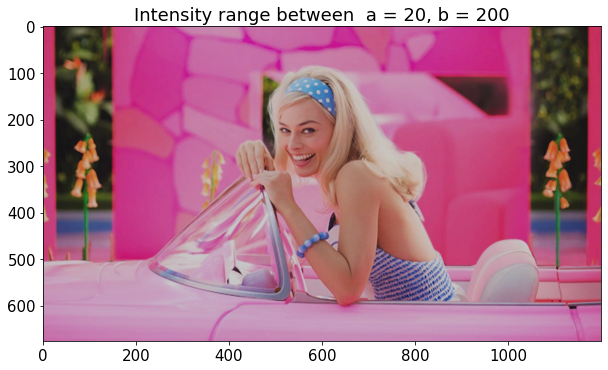

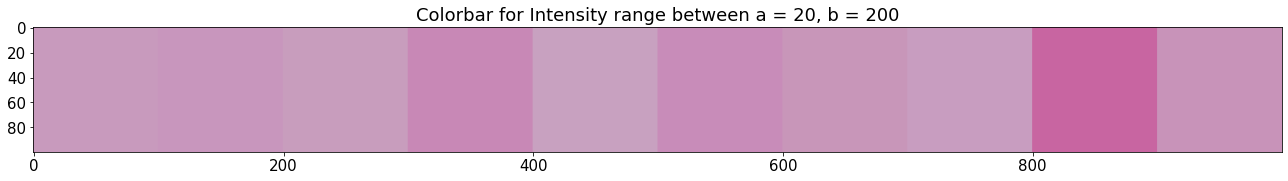

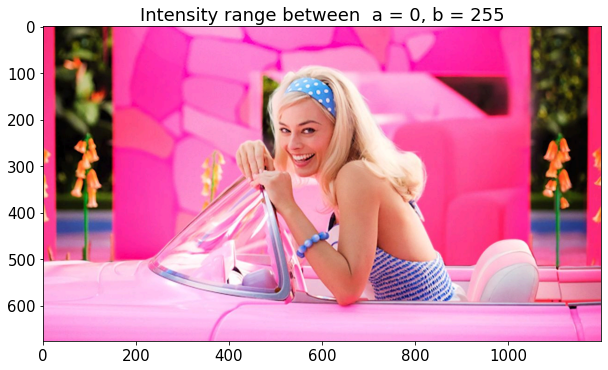

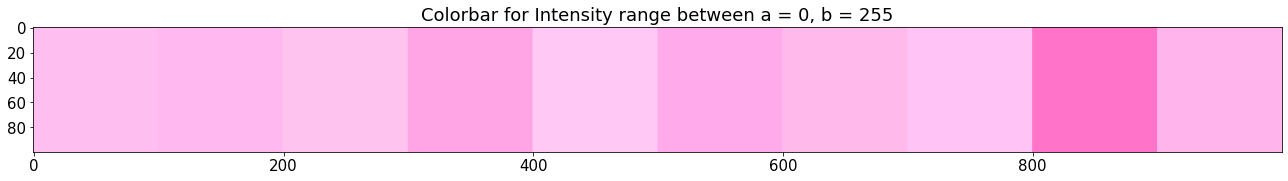

In [13]:
low = [60,50,20,0]
high = [120,150,200,255]

#Arbitrarily defining mix and max ranges for contrast stretching

# Progressively decreasing low value and increasing high value to expand range for contrast

for i in range(0,4):
    a = low[i]
    b = high[i]

    contrast_barbie = linContrastStretching(flatbarbie,a,b)
    stretched_colorbar = makecolorbar(contrast_barbie)

    plt.figure(figsize=(10, 6))
    plt.imshow(contrast_barbie)
    plt.title(f'Intensity range between  a = {a}, b = {b}', fontsize=18)
    plt.xticks(fontsize=15) 
    plt.yticks(fontsize=15) 

    
    plt.figure(figsize=(18, 6))
    plt.imshow(stretched_colorbar)
    plt.title(f"Colorbar for Intensity range between a = {a}, b = {b}", fontsize=18)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)  

    print()
    print()
    print()
   

    plt.tight_layout()
    plt.show()

# Observations

## Colorbar for Flat Image
### 1. We observe that for the flat image, the colorbar is quite dull and spread over a rather small intensity range.
### 2. The colorbar appears lacks the variety of colors, making it challenging to distinguish between subtle variations of color in the image.
### 3. The limited intensity range restricts the representation of the full spectrum of colors, resulting in a less visually appealing and informative colorbar.

## Colorbar for Contrast stretched images
### 1. Contrast stretching enhances the range of pixel values in an image, spreading out the pixel intensities over a wider range.
### 2. The colorbar for the same shows a gradient of colors representing the expanded range of pixel intensities.
### 3. The color distribution along the colorbar is smoother, exhibiting a wider range of shades.
### 4. It further indicates that contrast stretching has enahnced the visual appeal of the image overall.

#### Note that in all the colorbars, the relative shades distinction between the various colors remains the same, just their intensity difference becomes more pronounced and hence easier to distinguish.

# 4 Histogram Equalization

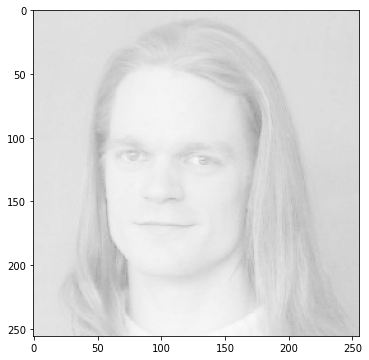

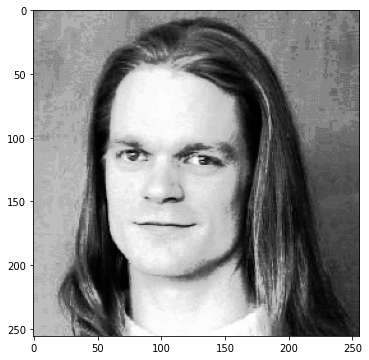

True

In [14]:
def histEqualization(image):

    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    #calculating Cumulative frequency

    cdf = hist.cumsum()
    # Normalize the CDF to the range [0, 255]

    cdf_min = np.min(cdf)
    cdf_max = np.max(cdf)
    cdf_normalized = 255*(cdf - cdf_min)/(cdf_max - cdf_min)
    
    # Use linear interpolation to create the new pixel values
    equalized_image = np.interp(image.flatten(), np.arange(0, 256), cdf_normalized).reshape(image.shape)

    return equalized_image.astype(np.uint8)

equalized = histEqualization(faded)

plt.figure(figsize=(10,6))
plt.imshow(faded)
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(equalized)
plt.show()

cv2.imwrite("../Images/results/histEqualized.png", equalized)

## Histogram comparison of the original and stretched image

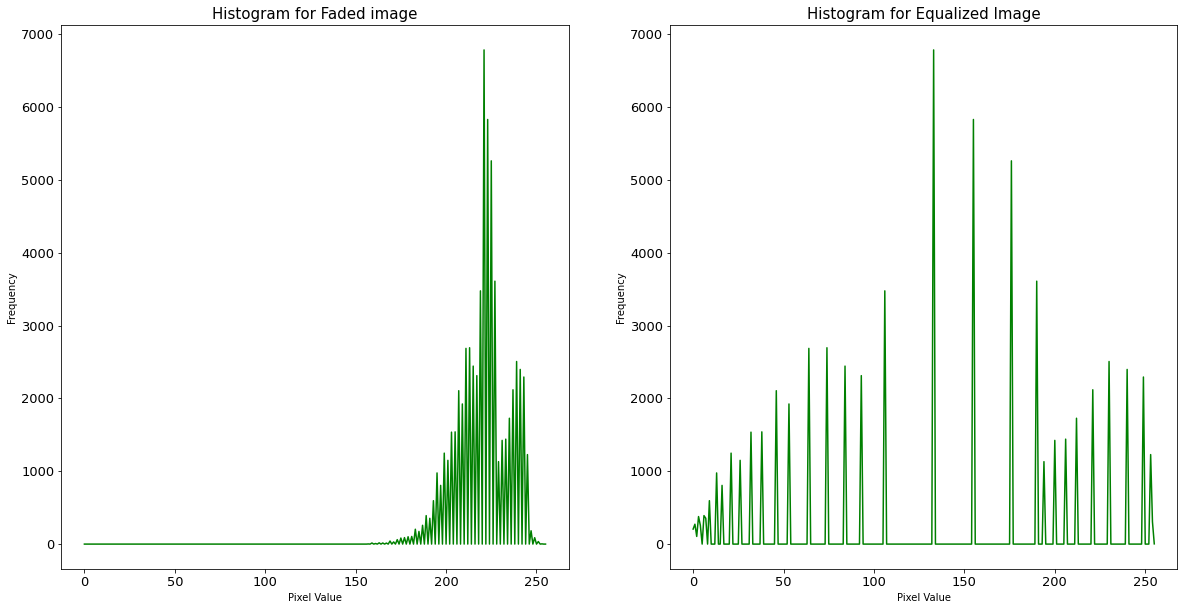

In [15]:
hist1 = cv2.calcHist([faded], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([equalized], [0], None, [256], [0, 256])

plt.figure(figsize =(20,10))

plt.subplot(1,2,1)
plt.plot(hist1, color="green")
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram for Faded image', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(1,2,2)
plt.plot(hist2, color="green")
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram for Equalized Image', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### * It can be observed that in the faded image the pixels are concentrated in higher intensities, i.e. to the right of the plot.
#### * In this histogram for Equalized image, the pixels are spread throughout the graph, such that the total count is same as in the faded image. 
#### Since this covers the entire range of intensity values, the result is a more contrasted image.

# 5. Explosion Effects

### Function to perform piecewise linear transform on an image

In [16]:
def piecewise_linear_transform(im, A, B):

    image = im.flatten()
    result = np.zeros_like(image)
    # creating a copy array of the original image
    
    for k in range(len(A)):
        x1,x2 = A[k]
        slope, intercept = B[k]

        mask = np.logical_and(image >= x1, image <= x2)

        transformed_intensities = slope*image + intercept
        transformed_intensities = np.clip(transformed_intensities, 0,1)
        # ensuring transformed intensities remain b/w 0 and 1
        result = np.where(mask, transformed_intensities, result)
        
    result = result.reshape(im.shape)
    return result

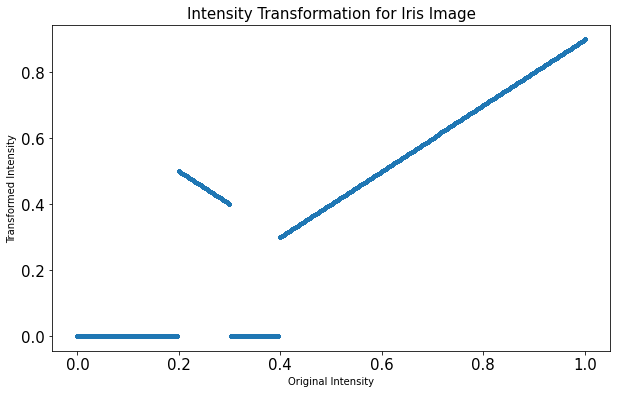

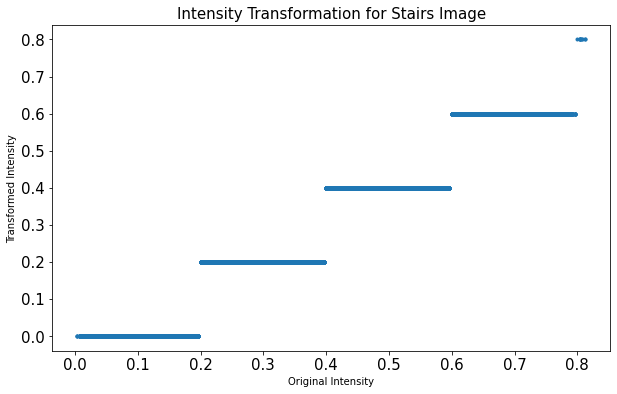

In [17]:
A_iris = [(0.0,0.2),(0.2,0.3),(0.3,0.4),(0.4,1)] 
B_iris = [(0.0,0.0),(-1,0.7),(0.0,0.0),(1.0,-0.1)]

A_stairs = [(0.0,0.2),(0.2,0.4),(0.4,0.6),(0.6,0.8),(0.8,1.0)]
B_stairs = [(0.0,0.0),(0.0,0.2),(0.0,0.4),(0.0,0.6),(0.0,0.8)]

# defining A and B vectors for the iris and stairs image, as mentioned in question.

gray_iris = cv2.cvtColor(iris, cv2.COLOR_BGR2GRAY)/255.0
gray_stairs = cv2.cvtColor(stairs, cv2.COLOR_BGR2GRAY)/255.0

piecewise_iris = piecewise_linear_transform(gray_iris, A_iris, B_iris)
piecewise_stairs = piecewise_linear_transform(gray_stairs, A_stairs, B_stairs)

plt.figure(figsize=(10, 6))
plt.scatter(gray_iris, piecewise_iris.flatten(), marker='.')
plt.title("Intensity Transformation for Iris Image", fontsize=15)
plt.xlabel("Original Intensity")
plt.ylabel("Transformed Intensity")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(gray_stairs, piecewise_stairs.flatten(), marker='.')
plt.title("Intensity Transformation for Stairs Image", fontsize=15)
plt.xlabel("Original Intensity")
plt.ylabel("Transformed Intensity")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# cv2.imwrite("../Images/results/piecewise_iris.png", piecewise_iris)
# cv2.imwrite("../Images/results/piecewise_stairs.png", piecewise_stairs)

### Displaying the original and transformed images

Text(0.5, 1.0, 'Stairs image after piecewise linear transform')

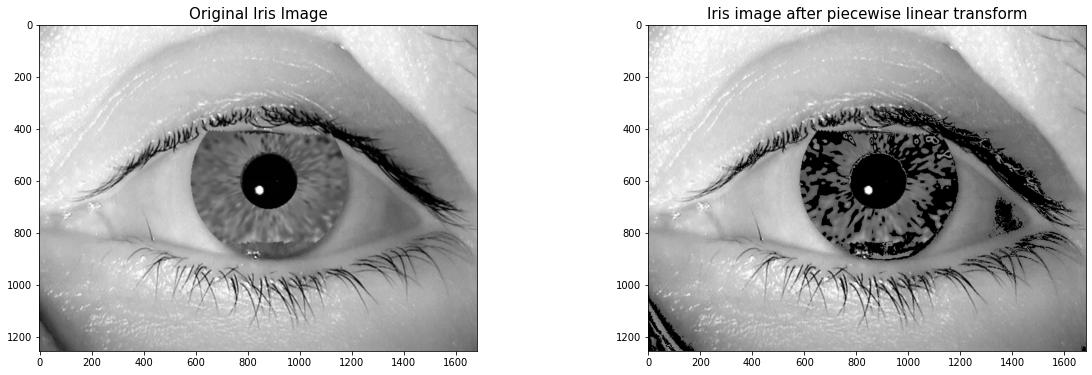

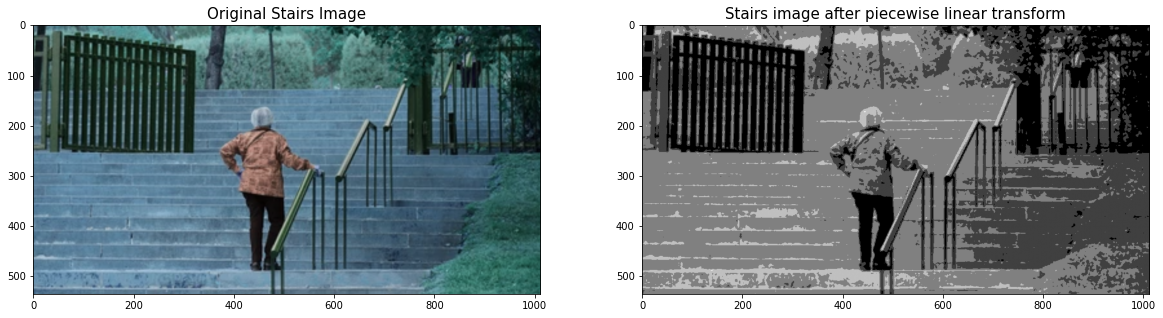

In [18]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.imshow(iris, cmap='gray')
plt.title("Original Iris Image",fontsize = 15)

plt.subplot(1,2,2)
plt.imshow(piecewise_iris, cmap='gray')
plt.title("Iris image after piecewise linear transform", fontsize= 15)

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.imshow(stairs, cmap='gray')
plt.title("Original Stairs Image",fontsize = 15)

plt.subplot(1,2,2)
plt.imshow(piecewise_stairs, cmap='gray')
plt.title("Stairs image after piecewise linear transform", fontsize= 15)

# cv2.imwrite("../Images/results/new_iris.jpg", piecewise_iris)
# cv2.imwrite("../Images/results/new_stairs.jpg", piecewise_stairs)


# 6. Oppie's Filter

### Original v/s Transformed intensities in Micro and Transform image respectively

In [19]:
# Loading images
micro = "micro.jpg"
path_micro = os.path.join(images_folder, micro)
micro = cv2.imread(path_micro, cv2.IMREAD_GRAYSCALE)/255.0

transform = "transformed.png"
path_transform = os.path.join(images_folder, transform)
transform = cv2.imread(path_transform, cv2.IMREAD_GRAYSCALE)/255.0

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

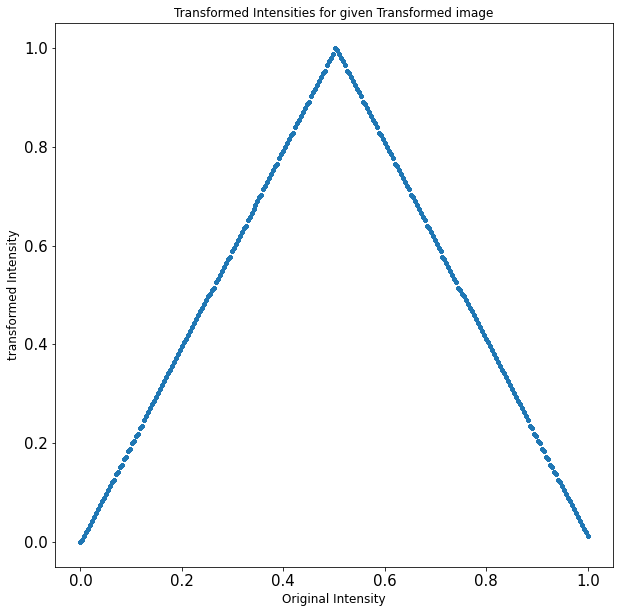

In [20]:
plt.figure(figsize=(10, 10))  # Adjust the values as needed
plt.scatter(micro, transform, marker='.')
plt.title("Transformed Intensities for given Transformed image", fontsize=12)
plt.xlabel("Original Intensity", fontsize=12)
plt.ylabel("transformed Intensity", fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Observed points from above graph:
### The following coordinates can be estimated by observing the above graph: 
#### p1 is the starting point, p2 is where the slope changes and p3 is the ending point

In [21]:
p1 = [0.0, 0.0]
p2 = [0.5, 1.0]
p3 = [1.0, 0.0]

# Slope and intercept for the line passing through the points p1 and p2 is: 

m1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
c1 = p1[1] - m1 * p1[0]

# Slope and intercept for the line passing through the points p2 and p3 is: 

m2 = (p3[1] - p2[1]) / (p3[0] - p2[0])
c2 = p2[1] - m2*p2[0]

### Forming the A and B vectors

In [22]:
A=[(p1[0], p2[0]), (p2[0], p3[0])]
B=[(m1,c1), (m2, c2)]

## Verifying the transformed image output for given micro image using the vectors obtained above

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

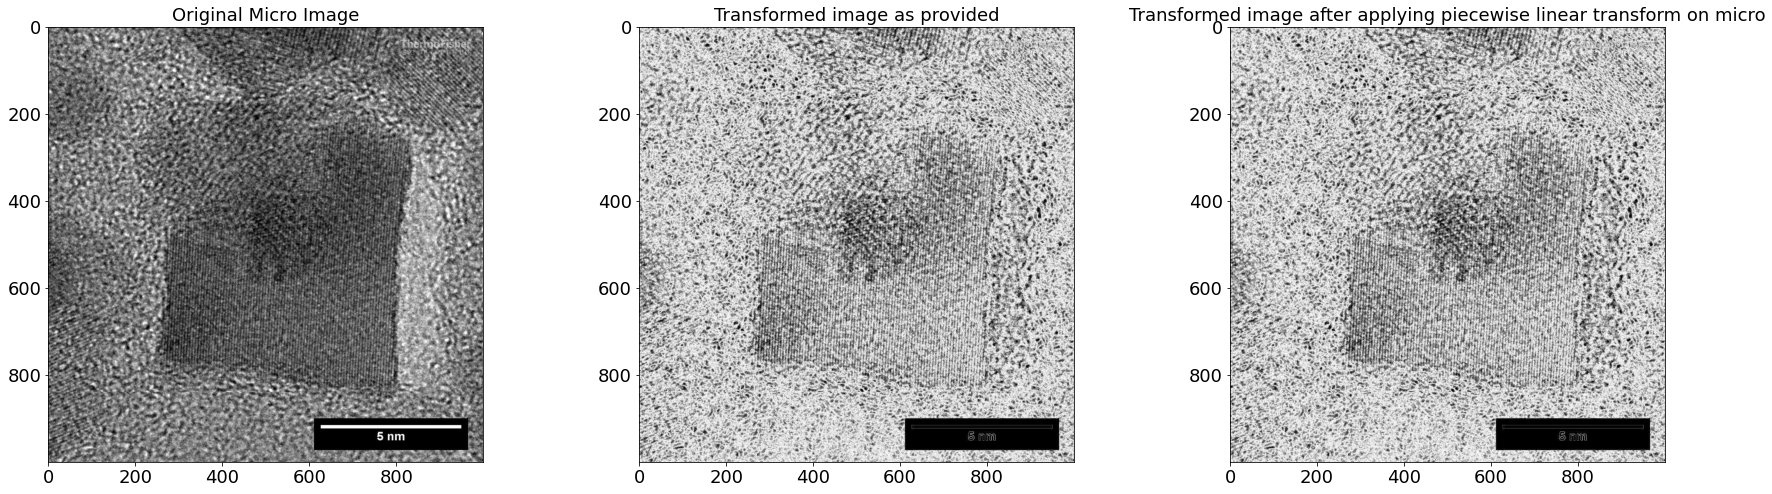

In [23]:
piecewise_micro = piecewise_linear_transform(micro, A, B)

plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
plt.imshow(micro, cmap='gray')
plt.title("Original Micro Image",fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1,3,2)
plt.imshow(transform, cmap='gray')
plt.title("Transformed image as provided", fontsize= 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1,3,3)
plt.imshow(piecewise_micro, cmap='gray')
plt.title("Transformed image after applying piecewise linear transform on micro", fontsize= 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

## Intensity transformation graph for the new transformed image 

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

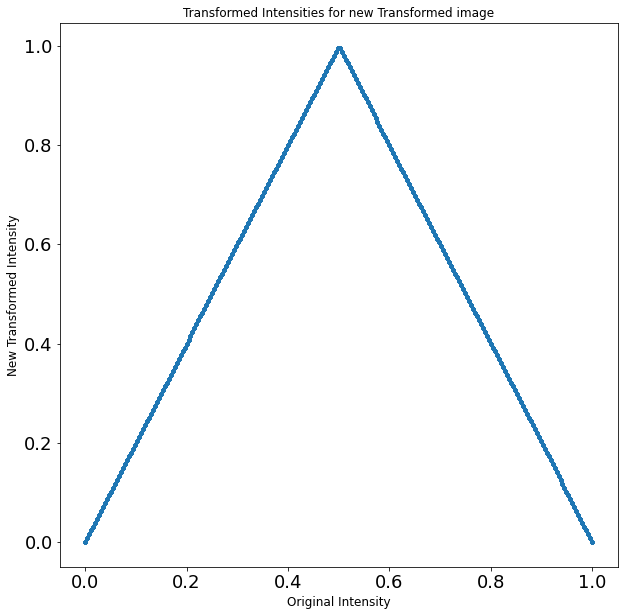

In [24]:
plt.figure(figsize=(10, 10))  # Adjust the values as needed
plt.scatter(micro, piecewise_micro, marker='.')
plt.title("Transformed Intensities for new Transformed image", fontsize=12)
plt.xlabel("Original Intensity", fontsize=12)
plt.ylabel("New Transformed Intensity", fontsize=12)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

##### Hence, we observe that the transformed image obtained on applying the piecewise_linear_transform function on the micro image is same as the transformed image provided in the Images folder.
##### Also, the intensity transformation graph for the new transformed image is same as that of the provided transformed image. 
##### Therefore, it can be deduced that the vectors A and B are correctly formed.

### 6.3 Applying the piecewise linear transformation to more sample images using the vectors A amd B obtained above

Text(0.5, 1.0, 'Coffee image after piecewise linear transform')

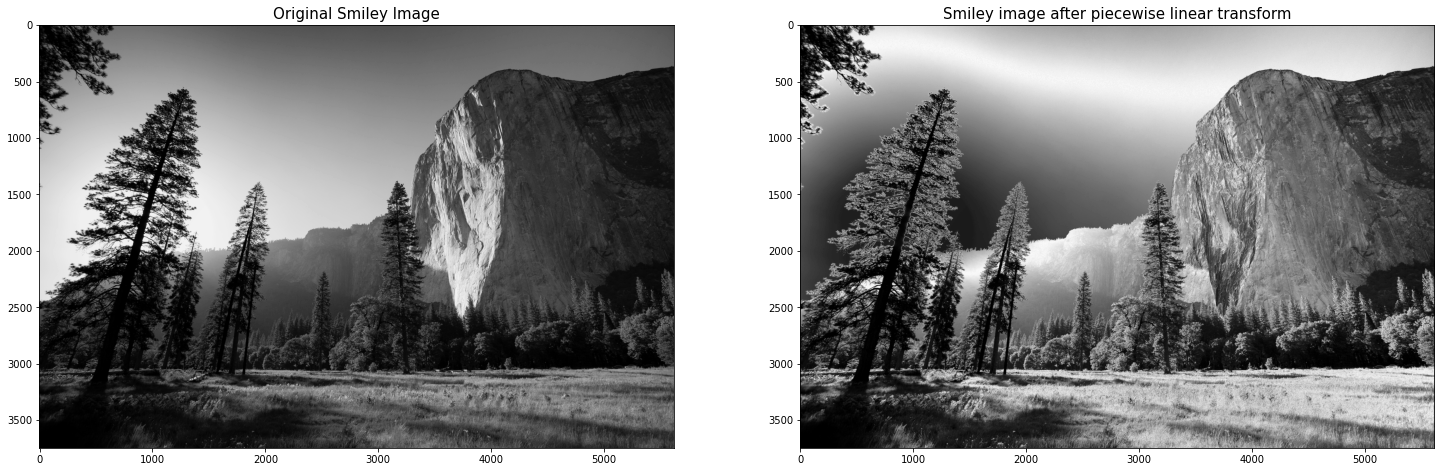

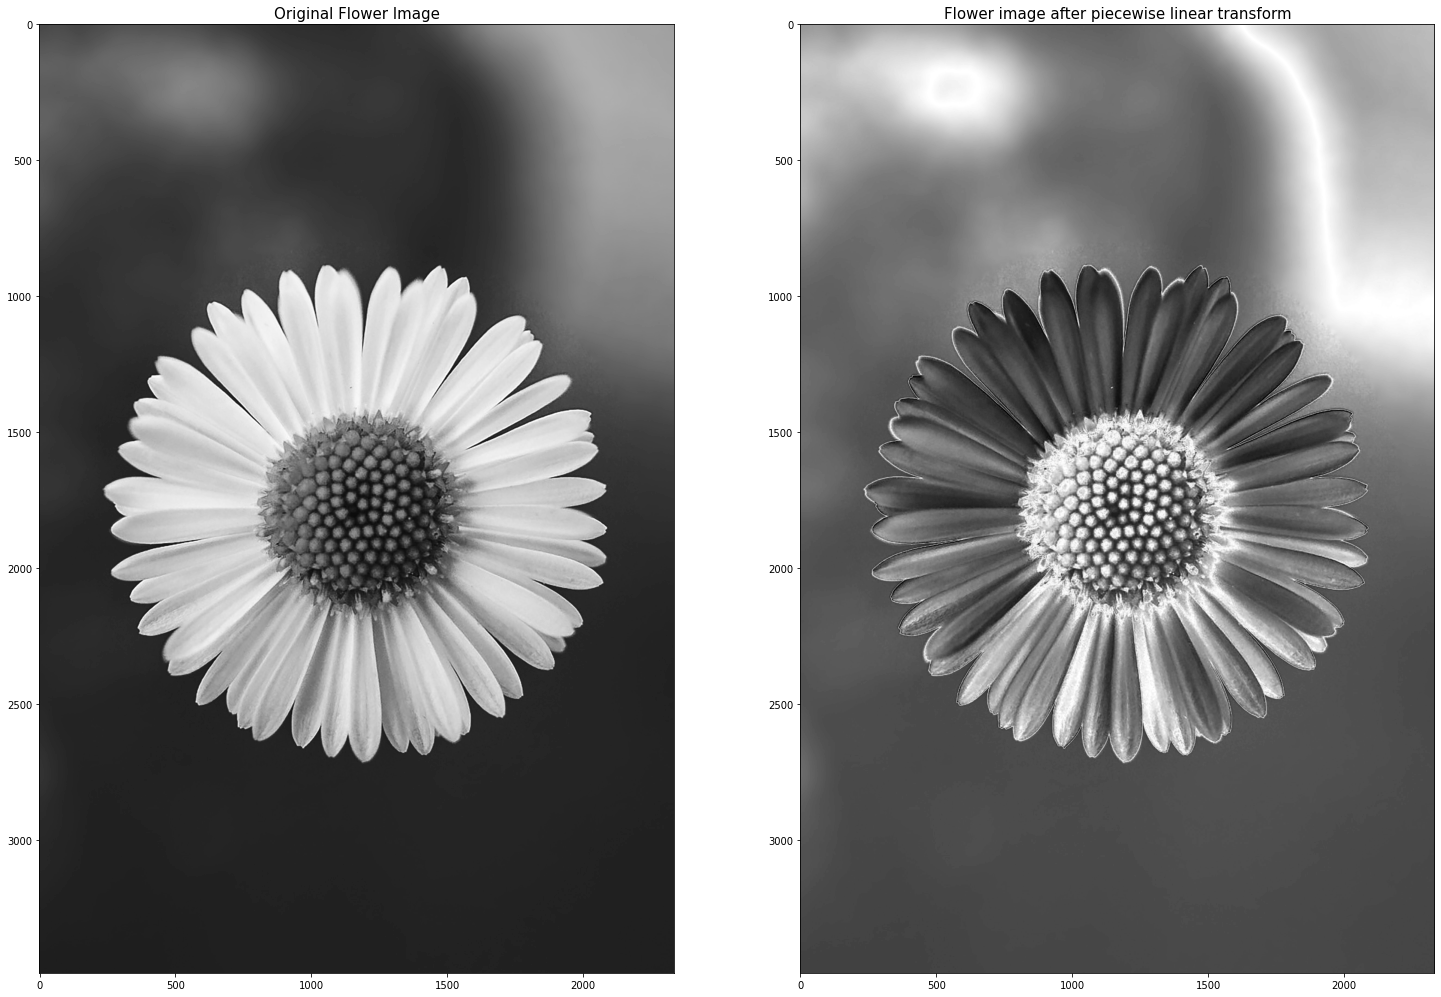

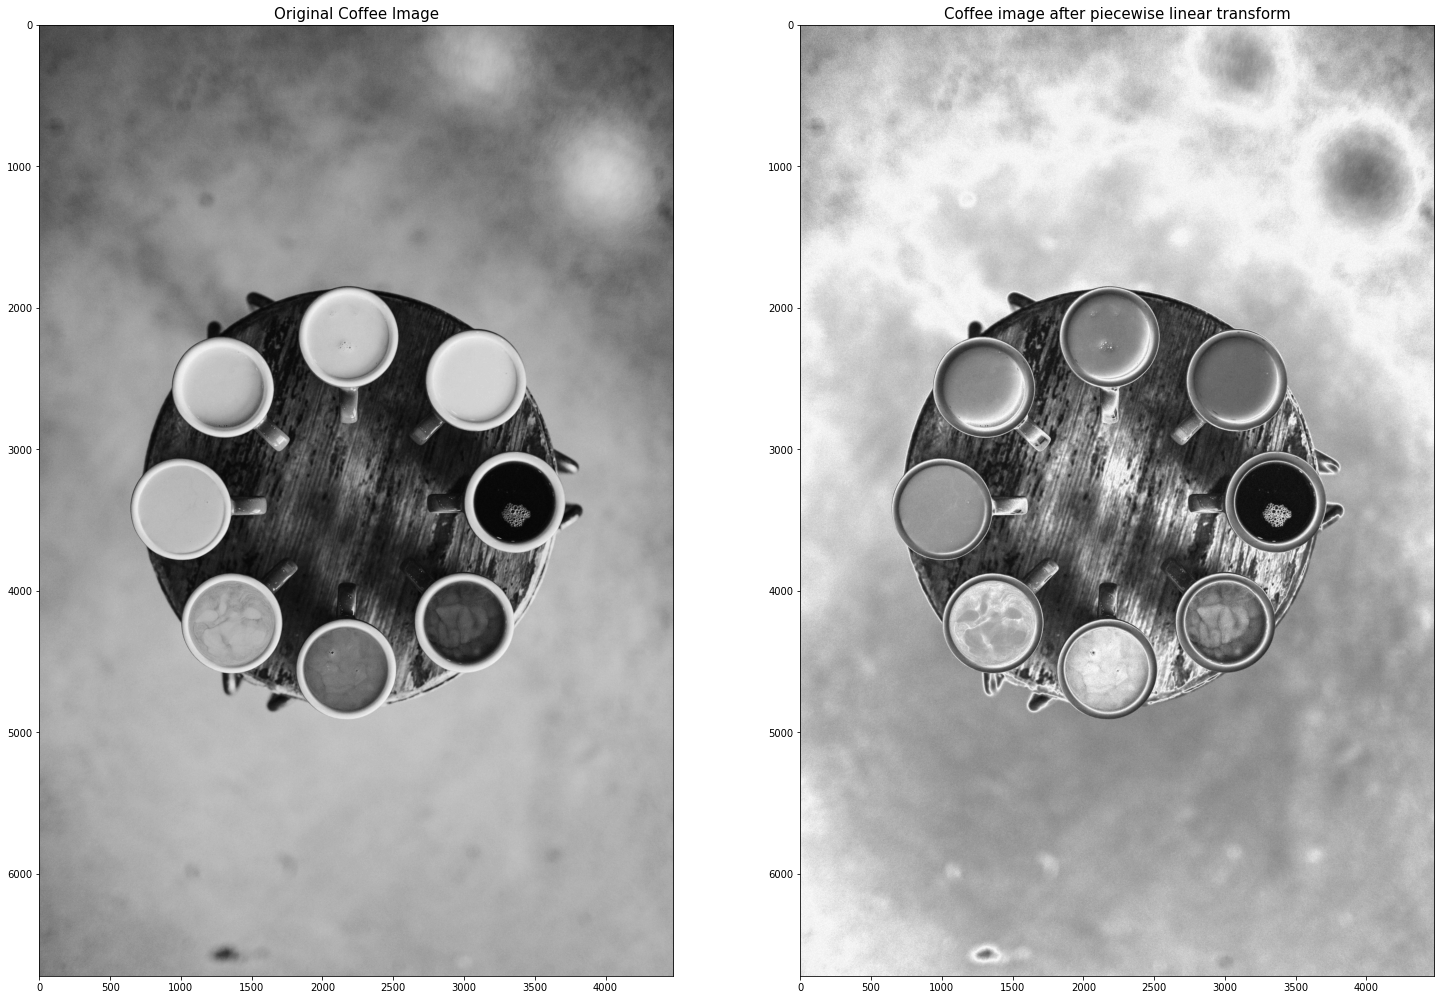

In [25]:
flower = "flower.jpg"
coffee = "coffee.jpg"
mountain = "mountain.jpg"

path_flower = os.path.join(images_folder, flower)
flower = cv2.imread(path_flower)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)/255.0

path_coffee = os.path.join(images_folder, coffee)
coffee = cv2.imread(path_coffee)
coffee = cv2.cvtColor(coffee, cv2.COLOR_BGR2GRAY)/255.0

path_mountain = os.path.join(images_folder, mountain)
mountain = cv2.imread(path_mountain)
mountain = cv2.cvtColor(mountain, cv2.COLOR_BGR2GRAY)/255.0

piecewise_flower = piecewise_linear_transform(flower, A, B)
piecewise_coffee = piecewise_linear_transform(coffee, A, B)
piecewise_mountain = piecewise_linear_transform(mountain, A, B)


plt.figure(figsize=(25,20))

plt.subplot(1,2,1)
plt.imshow(mountain, cmap='gray')
plt.title("Original Smiley Image",fontsize = 15)

plt.subplot(1,2,2)
plt.imshow(piecewise_mountain, cmap='gray')
plt.title("Smiley image after piecewise linear transform", fontsize= 15)

plt.figure(figsize=(25,20))

plt.subplot(1,2,1)
plt.imshow(flower, cmap='gray')
plt.title("Original Flower Image",fontsize = 15)

plt.subplot(1,2,2)
plt.imshow(piecewise_flower, cmap='gray')
plt.title("Flower image after piecewise linear transform", fontsize= 15)

plt.figure(figsize=(25,20))

plt.subplot(1,2,1)
plt.imshow(coffee, cmap='gray')
plt.title("Original Coffee Image",fontsize = 15)

plt.subplot(1,2,2)
plt.imshow(piecewise_coffee, cmap='gray')
plt.title("Coffee image after piecewise linear transform", fontsize= 15)